First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%  

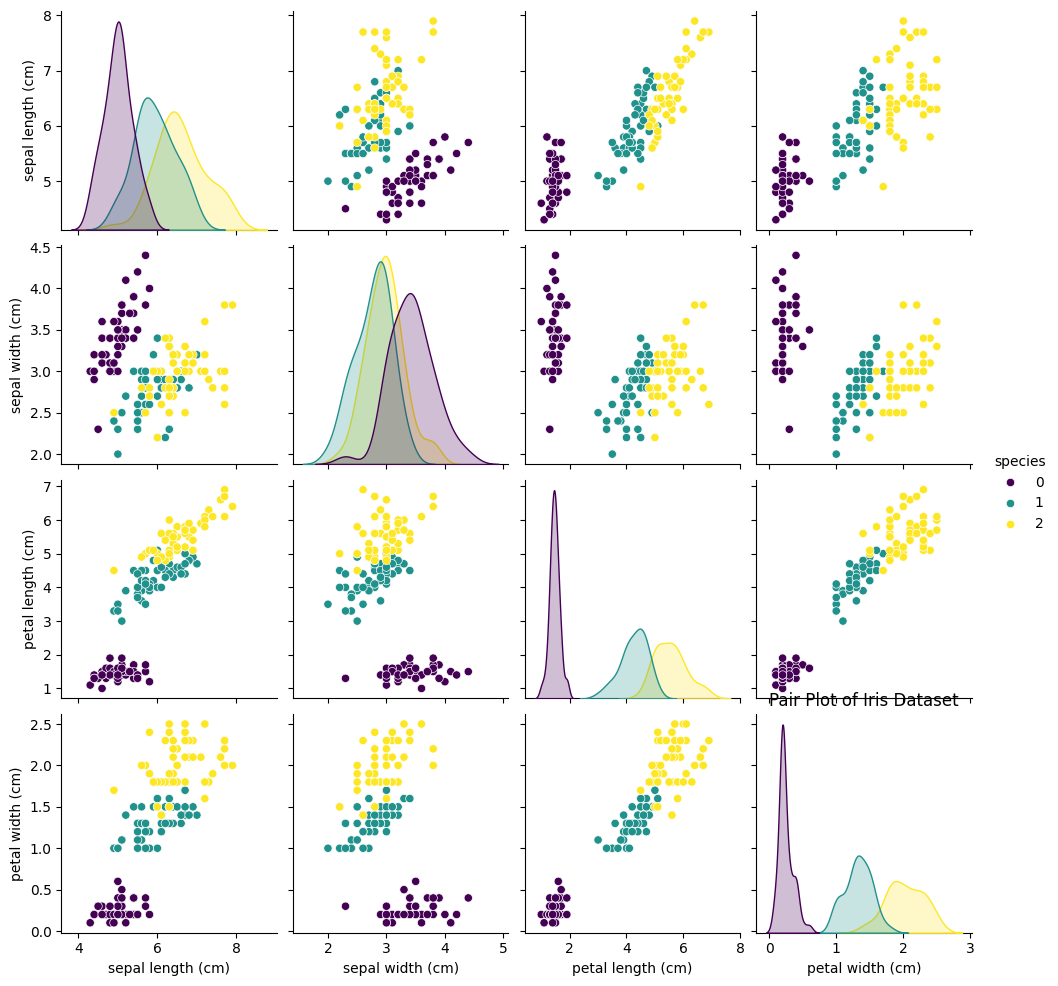

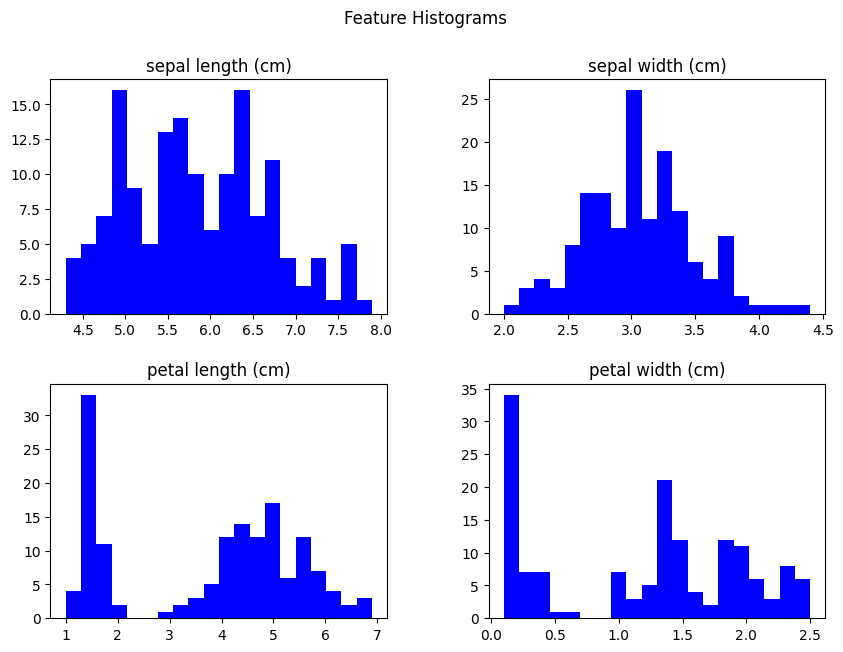

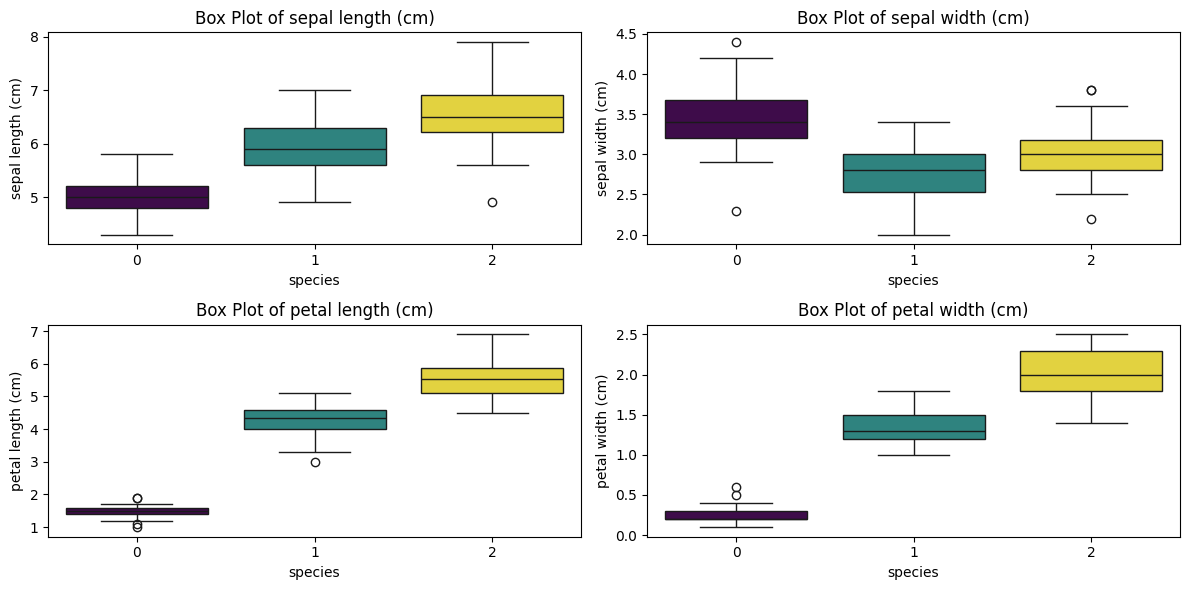

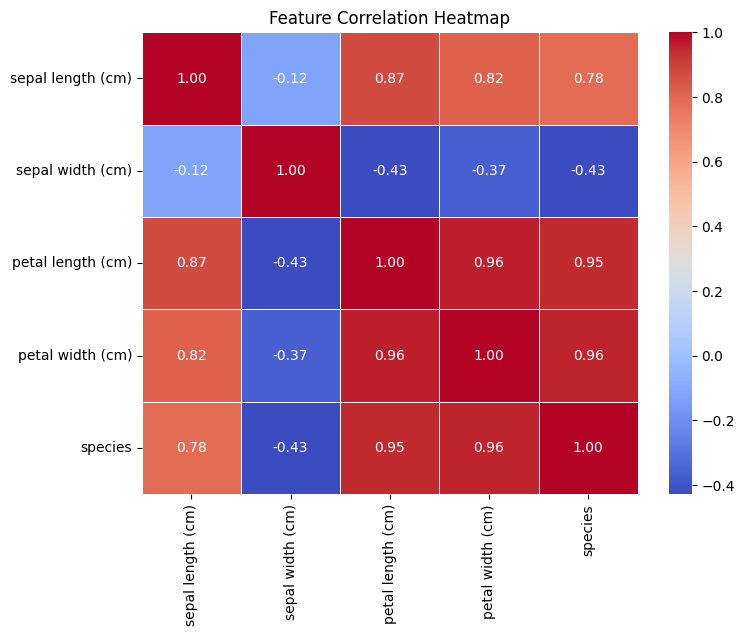

<ipython-input-4-639b62602468>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='viridis')


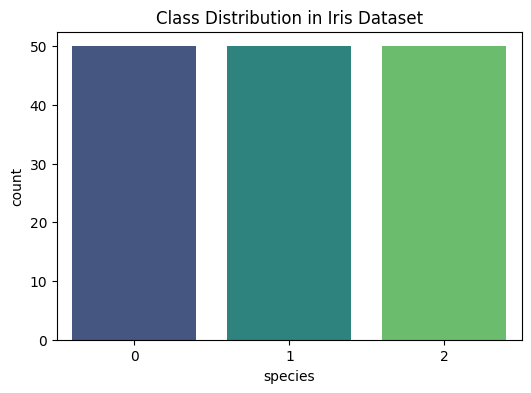

Model Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris_data = datasets.load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target

print("First few rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

print("\nData types and missing values:")
print(df.info())

sns.pairplot(df, hue='species', palette='viridis')
plt.title('Pair Plot of Iris Dataset')
plt.show()

df.drop('species', axis=1).hist(bins=20, figsize=(10, 7), grid=False, color='blue')
plt.suptitle('Feature Histograms')
plt.show()

plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df, hue='species', palette='viridis', legend=False)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, palette='viridis')
plt.title('Class Distribution in Iris Dataset')
plt.show()

X = df.drop('species', axis=1).values
y = df['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', probability=True)  # Enable probability estimates
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
